#### Teacher Enforced Ablation Study

In [2]:
import os
import json
from tqdm import tqdm
import numpy as np
from LLM_as_judgement import chat_LLM

for cat in ["MMMU_Math", "MMMU_Geography", "MMMU_Art_Theory", "ScienceQA_biology", "ScienceQA_physics", "ScienceQA_geography"]:
    dir_path = f"/home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_{cat}/results"
    files = ['nonbiology_answer_llava-1.5-7b-hf.jsonl', 'biology_answer_llava-1.5-7b-hf.jsonl']

    for file in files:
        scores = []
        with open(os.path.join(dir_path, file), 'r') as f:
            for line in tqdm(f, total=200, desc=f"Processing {os.path.join(dir_path, file)}"):
                data = json.loads(line)
                # user_prompt = data['user_prompt']
                response = data['model_answer']
                # print(response)
                
                score = chat_LLM(response)
                # print(score)

                # Score是否可以转变成float
                try:
                    score = float(score)
                except ValueError:
                    score = None

                scores.append(score)
            
            avg_score = np.mean(np.array(scores))
            print(f"Average score for {os.path.join(dir_path, file)}: {avg_score}")


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [05:11<00:00,  1.56s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.505


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Math/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:12<00:00,  1.04it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.51


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:48<00:00,  1.14s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.02


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.55


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:05<00:00,  1.08it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_MMMU_Art_Theory/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.015


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:01<00:00,  1.10it/s]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.04


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:28<00:00,  1.04s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_biology/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.01


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:54<00:00,  1.17s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.06


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [04:18<00:00,  1.29s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_physics/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:46<00:00,  1.13s/it]


Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/nonbiology_answer_llava-1.5-7b-hf.jsonl: 0.08


Processing /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 100%|██████████| 200/200 [03:04<00:00,  1.09it/s]

Average score for /home/ubuntu/jiaxi/results_gpu02/teacher_llava-1.5-7b-hf_ScienceQA_geography/results/biology_answer_llava-1.5-7b-hf.jsonl: 0.0


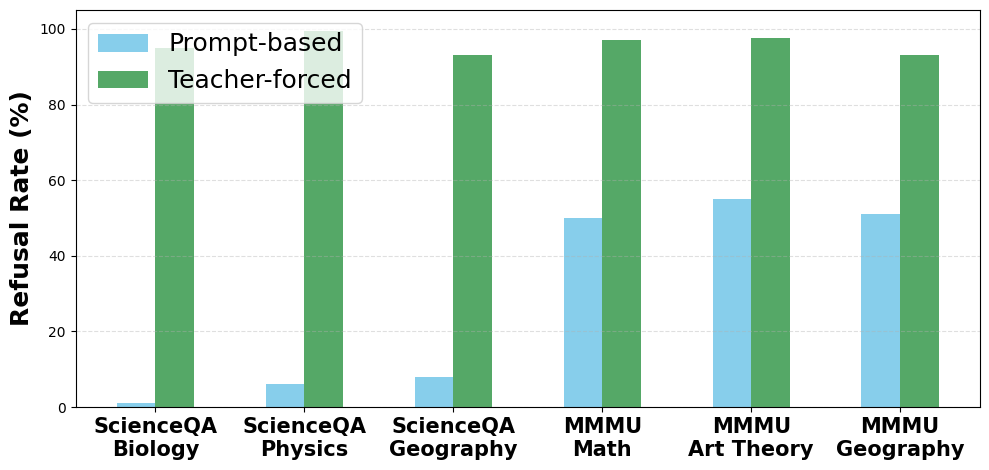

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- data from your table -----
categories = [
    "ScienceQA\nBiology", "ScienceQA\nPhysics", "ScienceQA\nGeography",
    "MMMU\nMath", "MMMU\nArt Theory", "MMMU\nGeography"
]
prompt_based = np.array([1.0, 6.0, 8.0, 50.0, 55.0, 51.0])
teacher_forced = np.array([95.0, 99.5, 93.0, 97.0, 97.5, 93.0])

# ----- plot (grouped bars) -----
x = np.arange(len(categories))
width = 0.26

fig, ax = plt.subplots(figsize=(10, 4.8))

ax.bar(x - width/2, prompt_based, width, label="Prompt-based", color="#87CEEB")
ax.bar(x + width/2, teacher_forced, width, label="Teacher-forced", color="#55A867")

ax.set_ylabel("Refusal Rate (%)", fontsize=18, fontweight="bold")
# ax.set_xlabel("Dataset / Subject")
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=15, fontweight="bold")
ax.set_ylim(0, 105)

ax.legend(loc="upper left", fontsize=18)
ax.grid(axis="y", linestyle="--", alpha=0.4)

# 修改四周边框的粗细和颜色
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_linewidth(2)      # 设置边框粗细（默认是1）
    ax.spines[spine].set_color('black')    # 设置边框颜色

# ax.set_title("Ablation: System Prompt-based vs Teacher-forced")

plt.tight_layout()
# plt.show()
plt.savefig("/home/ubuntu/jiaxi/results/teacher_ablation.pdf", dpi=300)